### 럭키백의 확률
#### 데이터 준비하기


In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species'])) # Species 컬럼의 고유값 리턴

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
fish_input=fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy() # 컬럼에 대한 내용을 넘파이 배열로 리턴
fish_input2=fish.iloc[:,1:6].to_numpy()

In [4]:
print(fish_input[:5])
print(fish_input2[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [5]:
fish_target = fish['Species'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # 객체 생성
ss.fit(train_input) # 학습
train_scaled = ss.transform(train_input) # 변형
test_scaled = ss.transform(test_input) # 변형

In [8]:
print(train_scaled.shape, train_target.shape)
print(test_scaled.shape, test_target.shape)

(119, 5) (119,)
(40, 5) (40,)


#### k-최근접 이웃 분류기의 확률 예측

In [9]:
from sklearn.neighbors import KNeighborsClassifier # 임포트
kn = KNeighborsClassifier(n_neighbors=3) # 객체 생성
kn.fit(train_scaled, train_target) # 학습
print(kn.score(train_scaled, train_target)) # 훈련 세트 평가
print(kn.score(test_scaled, test_target)) # 테스트 세트 평가

0.8907563025210085
0.85


- 다중 분류: 타깃 데이터에 2개 이상의 클래스가 포함된 문제

In [10]:
print(kn.classes_) # 타깃값을 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 정렬됨

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [11]:
print(kn.predict(test_scaled[:5])) # 테스트 세트에 있는 처음 5개 샘플 값 예측

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [12]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) # 클래스에 대한 확률 구하기. predict_proba. predict_proba의 출력은 항상 0과 1 사이의 값이며 두 클래스에 대한 확률의 합은 항상 1임.
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


[지도 학습 - 분류 예측의 불확실성 추정](https://subinium.github.io/MLwithPython-2-4/)

In [13]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


#### 로지스틱 회귀

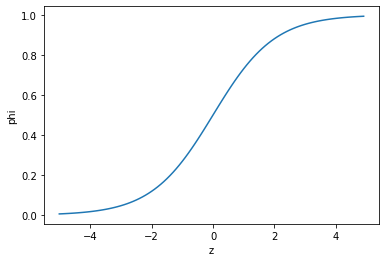

In [14]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1)
phi = 1 / (1+np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

#### 로지스틱 회귀로 이진 분류 수행하기기

In [15]:
# 넘파이 불리언 인덱싱
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [16]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [17]:
from sklearn.linear_model import LogisticRegression # 선형 모델임
lr = LogisticRegression() # 객체 생성
lr.fit(train_bream_smelt, target_bream_smelt) # 학습

LogisticRegression()

In [18]:
print(lr.predict(train_bream_smelt[:5])) # 예측

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [19]:
print(lr.predict_proba(train_bream_smelt[:5])) # 예측 확률, 첫번째 열이 0에 대한 확률, 두번째 열이 1에 대한 확률 (2개의 생선(이진)으로 학습했으므로 2개 열 리턴턴)

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [20]:
print(lr.classes_) # Bream 0, Smelt 1

['Bream' 'Smelt']


In [21]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [22]:
decisions = lr.decision_function(train_bream_smelt[:5]) # z값 계산
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [23]:
from scipy.special import expit # 시그모이드 함수(expit, z값을 넣으면 확률을 얻을 수 있음)
print(expit(decisions)) # proba의 두번째 열과 값이 동일. 양성(1) 클래스에 대한 z값 리턴

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


- 이진 분류일 경우 predict_prova() 메서드는 음성 클래스(0) 와 양성 클래스(1) 에 대한 확률 출력
- decision_function() 메서드는 양성 클래스에 대한 z값 계산
- coef_ 속성과 intercept_ 속성에는 로지스틱 모델이 학습한 선형 방정식의 계수가 있음음

#### 로지스틱 회귀로 다중 분류 수행하기기

In [24]:
lr = LogisticRegression(C=20, max_iter=1000) # max_iter로 반복횟수 지정. 기본값 100. 규제 제어 매개변수 C. 작을수록 규제가 커짐. 기본값 1.
lr.fit(train_scaled, train_target) # 7개의 생선 데이터가 모두 들어있는것으로 학습습
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [25]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [26]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3)) # 7개 생선 데이터로 학습했기 때문에 7개의 열이 리턴(샘플마다 클래스 개수만큼 확률 출력)

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [27]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [28]:
print(lr.coef_.shape, lr.intercept_.shape) # 5개의 특성을 사용하므로 coef_ 배열의 열은 5개

(7, 5) (7,)


- 다중 분류는 클래스마다 z 값을 하나씩 계산
- 소프트맥스 함수를 사용하여 7개의 z값을 확률로 변환

In [29]:
decision = lr.decision_function(test_scaled[:5]) # z값 구하기
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [30]:
from scipy.special import softmax
proba = softmax(decision, axis=1) # axis=1, 행(샘플)에 대해 지정
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
